In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("D:/WORK/IBM project/Works/Datasets/car performance.csv")
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
df.drop('car name',axis=1,inplace=True)

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


{'whiskers': [<matplotlib.lines.Line2D at 0x20f42cf31c0>,
 'caps': [<matplotlib.lines.Line2D at 0x20f42cf3760>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f42cf2ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x20f42cf3d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f42cf3fd0>],
 'means': []}

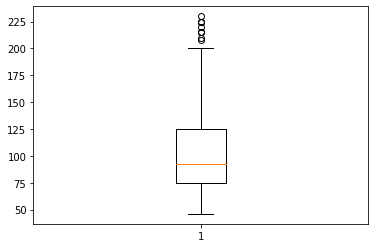

In [5]:
plt.boxplot(df["horsepower"])

In [6]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [7]:
x=df.drop('origin',axis=1)
y=df['origin']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit (x_train,y_train)
y_pred=clf.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.8166666666666667

In [11]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [12]:
accuracy_score(y_test,y_pred)

0.8416666666666667

In [13]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(
    base_estimator=RandomForestClassifier(max_depth=3, class_weight='balanced'), 
    #base estimator is decision trees by default
    n_estimators=300,
    learning_rate=0.5

)

adaboost_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         max_depth=3),
                   learning_rate=0.5, n_estimators=300)

In [14]:
def accuracy(model, data, labels):
    
    predictions = model.predict(data)
    acc = accuracy_score(labels, predictions)
    
    return acc

In [15]:
accuracy(adaboost_clf,x_train,y_train)

1.0

In [16]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'), 
    #base estimator is decision trees by default
    n_estimators=300,
    learning_rate=0.5)

adaboost_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3),
                   learning_rate=0.5, n_estimators=300)

In [17]:
accuracy(adaboost_clf,x_train,y_train)

0.9964028776978417

In [18]:
data=[[16,8,304,150,3433,12,70]]
model.predict(data)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [30]:
#24	4	113	95	2372	15	70   >> 3

data=[[32,6,100,110,3000,12,72]]
model.predict(data)


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

***Random Forest Regressor***

In [21]:
y = pd.DataFrame(df['mpg'])

In [22]:
X = df.drop('mpg',axis = 1)

In [23]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (278, 7)
The shape of X_test is: (120, 7)
The shape of y_train is: (278, 1)
The shape of y_test is: (120, 1)


In [26]:
from sklearn.ensemble import RandomForestRegressor

#intantiate the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Temp\ipykernel_3516\1739807047.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

In [27]:
# predict the values on test dataset using predict()
y_pred = rf_reg.predict(X_test)

In [29]:
from sklearn import metrics

# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 2.0099416666666663
Mean Squared Error (MSE): 7.826852891666659
Root Mean Squared Error (RMSE): 2.7976513170276704
